In [2]:
import os


import numpy as np
import pandas as pd

In [5]:
accs = np.load('results/naswot_accs_nasbench201_cifar10_True.npy')
accs.shape

(15625,)

In [42]:
score_list = []
for i in os.listdir('results'):
    scores_ = pd.DataFrame()
    if i.startswith('naswot_hook_') and i.endswith('.npy'):
        scores_['value'] = np.load('results/' + i)
        for elem, name_ in enumerate(i[:-4].split('_')):
            try:
                name_ = float(name_)
            except:
                pass
            scores_[elem] = name_
        scores_.reset_index(inplace=True)
    score_list.append(scores_)
    
score = pd.concat(score_list, axis=0)
score.replace([np.inf, -np.inf], np.nan, inplace=True)

In [43]:
score.head()

,index,value,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,52.497027,naswot,hook,logdet,nasbench201,cifar10,,none,0.05,1.0,True,4.0,1.0,1.0
1,1,53.894551,naswot,hook,logdet,nasbench201,cifar10,,none,0.05,1.0,True,4.0,1.0,1.0
2,2,52.538997,naswot,hook,logdet,nasbench201,cifar10,,none,0.05,1.0,True,4.0,1.0,1.0
3,3,43.968608,naswot,hook,logdet,nasbench201,cifar10,,none,0.05,1.0,True,4.0,1.0,1.0
4,4,52.492119,naswot,hook,logdet,nasbench201,cifar10,,none,0.05,1.0,True,4.0,1.0,1.0


In [44]:
df_batch = (
    score
    .groupby(['index', 10])
    .value.mean()
    .unstack()
)

df_batch.head()

10,4.0,16.0,128.0,512.0,2096.0
index,,,,,
0,52.497027,202.896132,1556.412947,6071.041761,24208.922929
1,53.894551,210.450299,1641.964899,6474.317950,26107.757931
2,52.538997,201.995005,1537.529201,5982.204728,23751.270476
3,43.968608,170.116220,1316.146437,5157.190328,20577.207059
4,52.492119,203.871414,1578.033792,6186.432054,24718.617766


In [68]:
df_norm_batch = (df_batch - df_batch.min()) / (df_batch.max() - df_batch.min())
df_norm_batch['mean'] = df_norm_batch.mean(axis=1)
df_norm_batch['std'] = df_norm_batch.std(axis=1)

df_norm_batch.head()

10,4.0,16.0,128.0,512.0,2096.0,mean,std
index,,,,,,,
0,0.695930,0.705223,0.666314,0.641807,0.624434,0.666742,0.030805
1,0.803111,0.823648,0.814167,0.804804,0.797849,0.808716,0.009137
2,0.699149,0.691097,0.633678,0.605901,0.582638,0.642493,0.045982
3,0.041854,0.191344,0.251079,0.272444,0.292761,0.209897,0.090617
4,0.695554,0.720513,0.703679,0.688446,0.670983,0.695835,0.016388


In [70]:
df_norm_batch.describe(percentiles=[0.8, 0.9, 0.95])

10,4.0,16.0,128.0,512.0,2096.0,mean,std
count,15424.000000,15424.000000,15424.000000,15424.000000,15424.000000,15424.000000,15424.000000
mean,0.672662,0.701647,0.700175,0.694912,0.691397,0.692159,0.020355
std,0.210167,0.194779,0.194719,0.195037,0.194224,0.196660,0.013277
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.697592,0.734224,0.745117,0.741745,0.736525,0.733408,0.017633
80%,0.808447,0.830410,0.843759,0.848881,0.849216,0.835116,0.028828
90%,0.881752,0.894084,0.897063,0.895528,0.893169,0.892266,0.036898
95%,0.887744,0.898932,0.907561,0.911399,0.914069,0.902134,0.046436
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.999115,0.090617


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76d2203390>,
      dtype=object)

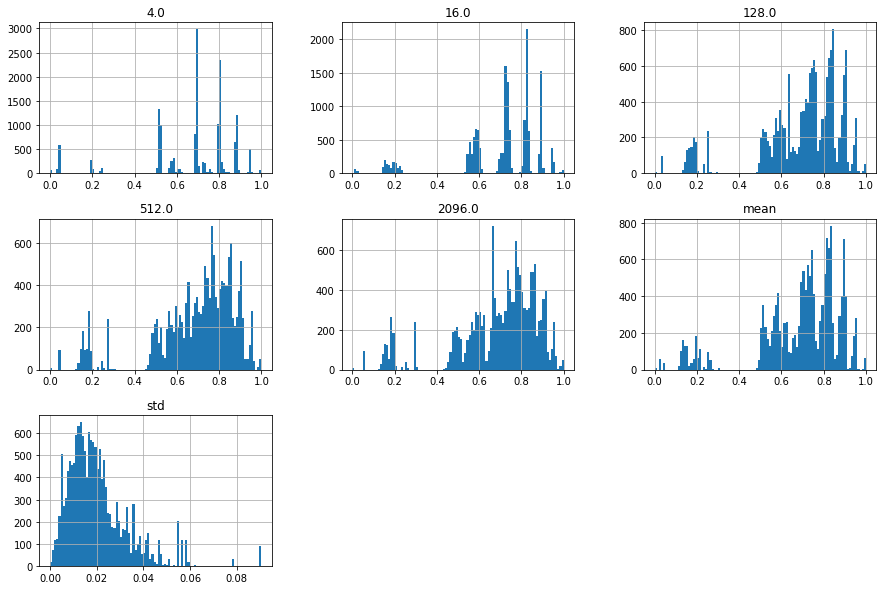

In [81]:
df_norm_batch.hist(figsize=(15, 10), bins=100)

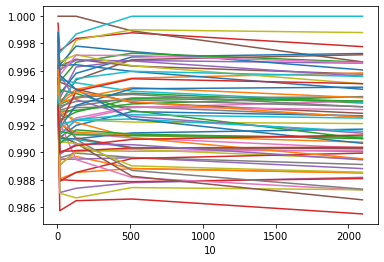

In [80]:
df_norm_batch[df_norm_batch['mean'] > 0.98].drop(['mean', 'std'], axis=1).T.plot(legend=False)